In [1]:
import pandas as pd
import nltk
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,Doc_ID,Sent_ID,Word,tag
0,1,1,1,Obesity,O
1,2,1,1,in,O
2,3,1,1,Low-,O
3,4,1,1,and,O
4,5,1,1,Middle-Income,O


In [4]:
df['tag'].value_counts()

O                4446206
B-indications      53003
I-indications      44624
Name: tag, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4543833 entries, 0 to 4543832
Data columns (total 5 columns):
id         int64
Doc_ID     int64
Sent_ID    int64
Word       object
tag        object
dtypes: int64(3), object(2)
memory usage: 173.3+ MB


In [7]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()

In [29]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1,2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=1000)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1000,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x000002CB807D7898>>,
        vocabulary=None)

In [8]:
df1=df.copy()

In [9]:
df1.drop(['id','Doc_ID','Sent_ID'],axis=1,inplace=True)

In [10]:
df1.head()

,Word,tag
0,Obesity,O
1,in,O
2,Low-,O
3,and,O
4,Middle-Income,O


In [11]:
df1.columns[df1.isna().any()].tolist()

['Word']

In [12]:
df1['Word'] = df1['Word'].fillna(df1['Word'].mode()[0])

In [13]:
labels=df1['tag']
trainX=df1['Word']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainX, labels, train_size = 0.8)

X_train

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


2606213              neurons
836274             editorial
1603279              control
3699279                   95
1391385           identified
969932                    I.
2895721              Steroid
2413390          feasibility
3306754            mechanism
1487006                    ,
2599071               phases
4156565                 jump
322403                     É
4115285                    )
1813822                  may
3272436                    5
1549898                    a
2565112                    1
123285               treated
1309046                  for
1338776           attachment
275824                    os
2075975                  key
966905                    or
3499416            adversely
1064177               common
4078593            platelets
1775985             nitrogen
1587363                close
654953                 lines
                 ...        
2018437                   to
124042                K-free
3682051                   To
96466         

In [33]:
# learn the 'vocabulary' of the training data
vect.fit(X_train)

# examine the fitted vocabulary
vect.get_feature_names()[:50]

['%',
 '&',
 "'",
 "''",
 "'s",
 '(',
 ')',
 '+/-',
 ',',
 '.',
 '0.05',
 '1',
 '10',
 '12',
 '2',
 '20',
 '3',
 '4',
 '5',
 '6',
 '95',
 ':',
 ';',
 '<',
 '=',
 '>',
 '[',
 ']',
 '``',
 'acid',
 'activation',
 'activity',
 'acute',
 'addition',
 'age',
 'analysis',
 'approach',
 'assessment',
 'associated',
 'association',
 'b',
 'based',
 'binding',
 'blood',
 'body',
 'bone',
 'brain',
 'c',
 'cancer',
 'care']

In [23]:
vect.get_feature_names()

['#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'s",
 '(',
 ')',
 '+',
 '+/-',
 ',',
 '-',
 '--',
 '-/-',
 '-1',
 '.',
 '...',
 '.001',
 '.05',
 '/',
 '/em',
 '/i',
 '/p',
 '0',
 '0.0001',
 '0.001',
 '0.01',
 '0.02',
 '0.03',
 '0.05',
 '0.1',
 '0.2',
 '0.3',
 '0.5',
 '1',
 '1.0',
 '1.2',
 '1.5',
 '10',
 '100',
 '11',
 '12',
 '120',
 '13',
 '14',
 '15',
 '150',
 '16',
 '17',
 '18',
 '19',
 '2',
 '2+',
 '2-',
 '2.5',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '21',
 '22',
 '23',
 '24',
 '25',
 '250',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '300',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '3d',
 '3h',
 '4',
 '40',
 '400',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '500',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '62',
 '63',
 '64',
 '65',
 '67',
 '68',
 '7',
 '70',
 '71',
 '72',
 '7

In [34]:
train_vectors = vect.transform(X_train)
train_vectors

<3635066x249 sparse matrix of type '<class 'numpy.int64'>'
	with 935290 stored elements in Compressed Sparse Row format>

In [35]:
test_vectors = vect.transform(X_test)
test_vectors

<908767x249 sparse matrix of type '<class 'numpy.int64'>'
	with 234353 stored elements in Compressed Sparse Row format>

In [36]:
pd.DataFrame(train_vectors.toarray(), columns=vect.get_feature_names()).head(4)

,%,&,','','s,(,),+/-,",",.,...,used,using,values,various,vitro,vs,water,women,work,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
nb = GaussianNB()

In [38]:
nb.fit(train_vectors.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
nb = GaussianNB()

In [39]:
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict

# generate your cross-validation prediction with 10 fold Stratified sampling
y_pred = cross_val_predict(nb, test_vectors.toarray(), y_test, cv=10)

print(classification_report(y_test, y_pred))
print("ACCURACY::", accuracy_score(y_pred, y_test))

               precision    recall  f1-score   support

B-indications       0.01      0.99      0.03     10616
I-indications       0.02      0.23      0.04      9066
            O       1.00      0.10      0.19    889085

    micro avg       0.11      0.11      0.11    908767
    macro avg       0.35      0.44      0.09    908767
 weighted avg       0.98      0.11      0.18    908767

ACCURACY:: 0.11443967485615125


In [2]:

import dill
dill.load_session('notebook_env.db')

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
# Fit the CountVectorizer to the training data
vec = CountVectorizer().fit(X_train)

In [63]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vec.transform(X_train)

In [64]:
X_train_vectorized

<3635066x95442 sparse matrix of type '<class 'numpy.int64'>'
	with 3114159 stored elements in Compressed Sparse Row format>

In [5]:
vec.transform(X_test)

<908767x95442 sparse matrix of type '<class 'numpy.int64'>'
	with 776788 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
predictions = model.predict(vec.transform(X_test))
# generate your cross-validation prediction with 10 fold Stratified sampling


In [7]:
predictions

array(['O', 'O', 'O', ..., 'O', 'O', 'O'], dtype=object)

In [8]:
#y_pred = cross_val_predict(model, test_vectors.toarray(), y_test, cv=10)

print(classification_report(y_test, predictions))
print("ACCURACY::", accuracy_score(predictions, y_test))

               precision    recall  f1-score   support

B-indications       0.78      0.37      0.51     10547
I-indications       0.61      0.37      0.46      8791
            O       0.99      1.00      0.99    889429

    micro avg       0.98      0.98      0.98    908767
    macro avg       0.79      0.58      0.65    908767
 weighted avg       0.98      0.98      0.98    908767

ACCURACY:: 0.9842533894826727


In [19]:
test=pd.read_csv('test.csv')

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994463 entries, 0 to 2994462
Data columns (total 4 columns):
id         int64
Doc_ID     int64
Sent_ID    int64
Word       object
dtypes: int64(3), object(1)
memory usage: 91.4+ MB


In [21]:
test.head()

,id,Doc_ID,Sent_ID,Word
0,4543834,30001,191283,CCCVA
1,4543835,30001,191283,","
2,4543836,30001,191283,MANOVA
3,4543837,30001,191283,","
4,4543838,30001,191283,my


In [22]:
test.columns[test.isna().any()].tolist()

['Word']

In [23]:
test['Word'] = test['Word'].fillna(test['Word'].mode()[0])

In [24]:
df_test=test.copy()

In [25]:
tes=test['Word']

In [37]:
X_test.drop(['id','Doc_ID','Sent_ID'],axis=1,inplace=True)

In [42]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994463 entries, 0 to 2994462
Data columns (total 1 columns):
Word    object
dtypes: object(1)
memory usage: 22.8+ MB


In [48]:
X_test['Word']

0                                              CCCVA
1                                                  ,
2                                             MANOVA
3                                                  ,
4                                                 my
5                                              black
6                                                hen
7                                                  .
8                                           Comments
9                                                 on
10                                          repeated
11                                          measures
12                                                 .
13                                          Nikolsky
14                                              sign
15                                                 ;
16                                              page
17                                              from
18                                           n

In [26]:
test_vectors = vec.transform(tes)

In [27]:
test_vectors

<2994463x95442 sparse matrix of type '<class 'numpy.int64'>'
	with 2501298 stored elements in Compressed Sparse Row format>

In [28]:
predictions = model.predict(test_vectors)

In [29]:
predictions

array(['I-indications', 'I-indications', 'I-indications', ...,
       'I-indications', 'I-indications', 'I-indications'], dtype=object)

In [30]:
df_test['tag']=list(predictions)

In [31]:
df_sub=df_test[['id','Sent_ID','tag']]

In [32]:
df1=pd.read_csv('sample_submission.csv')
df1.drop(['tag'],inplace=True,axis=1)
df1['tag']=list(predictions)

In [33]:
df1.head()

,id,Sent_ID,tag
0,4543834,191283,I-indications
1,4543835,191283,I-indications
2,4543836,191283,I-indications
3,4543837,191283,I-indications
4,4543838,191283,I-indications


In [34]:
df1.to_csv('sample_submission_6.csv',index=False)

In [28]:
print(classification_report(y_test, predictions))
print("ACCURACY::", accuracy_score(predictions, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [2994463, 908767]

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
predictions = model.predict(vec.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

ValueError: multiclass format is not supported

In [55]:
import dill
dill.dump_session('notebook_env.db')

In [1]:
import dill
dill.load_session('notebook_env.db')

In [6]:
# transform the documents in the training data to a document-term matrix
X_test_vectorized = vec.transform(X_test)

In [7]:
X_train_vectorized

<3635066x95442 sparse matrix of type '<class 'numpy.int64'>'
	with 3114159 stored elements in Compressed Sparse Row format>

In [8]:
X_test_vectorized

<908767x95442 sparse matrix of type '<class 'numpy.int64'>'
	with 776421 stored elements in Compressed Sparse Row format>

In [10]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler
rus = RandomUnderSampler(random_state=777)
X_RUS, y_RUS = rus.fit_sample(X_train_vectorized, y_train)

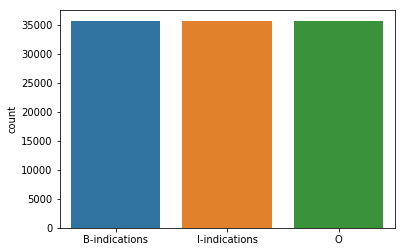

In [11]:
sns.countplot(y_RUS)

In [12]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(X_RUS, y_RUS)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
test=pd.read_csv('test.csv')

In [14]:
test.columns[test.isna().any()].tolist()
test['Word'] = test['Word'].fillna(test['Word'].mode()[0])

In [15]:
df_test=test.copy()

In [16]:
tes=test['Word']

In [18]:
pre=model.predict(tes)

ValueError: could not convert string to float: '>'

In [35]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [36]:
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(X_train_vectorized, y_train)

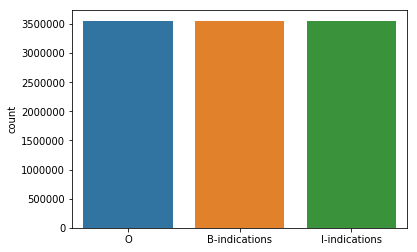

In [37]:
sns.countplot(y_ROS)

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(X_ROS, y_ROS)